## In this script we generate the plots for the model update task.

In [6]:
""" Imports """ 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec 

from src.signals import signal_context_switching_simple
from src.signals import spike_to_F
from src.signals import rolling_average


import pickle
import cmcrameri.cm as cmc

update_paul = ["#233954", "#ea5e48", "#1e7d72", "#f49546", "#c8be7c", "#480fcb"]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=update_paul)


# A1. Plotting of the stimulus signal
Strictly not necesary for the publication.

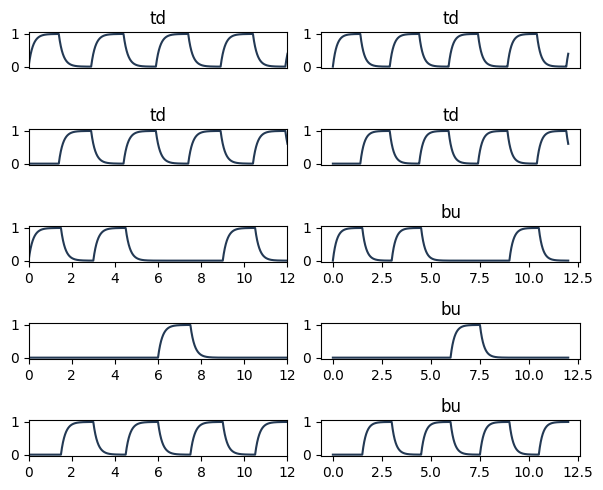

In [7]:
dt = 0.001 #second
T = 12000 #timesteps

tau_rise = 0.080
tau_decay = 0.4

x_duration = 1.5 #second

prediction_offset = 0.1 #second
T=12000 #time steps

tau_stimulus = 0.2 #decay time of the stimulus

""" Plot the stimulus """

with open("signal_model_update.pickle", "rb") as file:
    t,bu,td,t1,t2 = pickle.load(file)

# Create a new figure
fig = plt.figure(figsize=(6, 5))

grid = GridSpec(nrows=5,ncols=2,width_ratios=[1,1],height_ratios=[1,1,1,1,1])
ax = np.array([ [plt.subplot(grid[0,0]), plt.subplot(grid[0,1])], 
                [plt.subplot(grid[1,0]), plt.subplot(grid[1,1])],
                [plt.subplot(grid[2,0]), plt.subplot(grid[2,1])],
                [plt.subplot(grid[3,0]), plt.subplot(grid[3,1])],
                [plt.subplot(grid[4,0]), plt.subplot(grid[4,1])]]).T.flatten()

# Create the first subplot
for i, td_ in enumerate(td.T):
    ax[i].plot(t,td_)
    ax[i].set_xlim([0, dt*len(t)])
    ax[i].set_title('td')
    ax[i].set_xticks([])

for i, bu_ in enumerate(bu.T):
    ax[i+len(td.T)].plot(t,bu_)
    ax[i+len(td.T)].set_xlim([0, dt*len(t)])

with open("signal_model_update_snapshot.pickle", "rb") as file:
    t,bu,td,t1,t2 = pickle.load(file)
# Create the first subplot

for i, td_ in enumerate(td.T):
    ax[i+5].plot(t,td_)
    #ax[i+5].set_xlim([95, 100])
    ax[i+5].set_title('td')
    ax[i+5].set_xticks([])

for i, bu_ in enumerate(bu.T):
    ax[i+5+len(td.T)].plot(t,bu_)
    ax[i+5+len(td.T)].set_title('bu')

fig.tight_layout()
#plt.savefig("model_update_task.pdf")



# A2. Development debug plot
Here one can easily see the activity and the switching occuring, also not necesary for the publication.

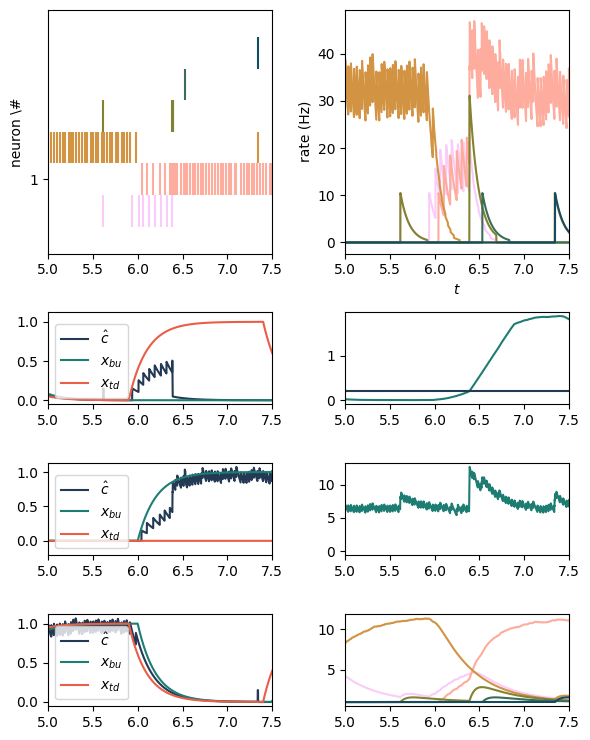

In [12]:

with open(f"./network.pickle",'rb') as file:
    simple_inference_network = pickle.load(file)
with open("./signal_model_update.pickle", "rb") as file:
#with open("./signal_kf.pickle", "rb") as file:
    t,bu,td,t1,t2 = pickle.load(file)

n_neurons = simple_inference_network.Psi['n_neurons']
end = T*dt -1
xlim_small = [end -4,end]
xlim_small = [5, 7.5]
#xlim_small = [0,end]
fig, _= plt.subplots(figsize=(6,7.5))

grid = GridSpec(nrows=5,ncols=2,width_ratios=[1,1],height_ratios=[1,1,1,1,1])
ax = np.array([ plt.subplot(grid[:2,0]), plt.subplot(grid[:2,1]), 
                plt.subplot(grid[2,0]), plt.subplot(grid[2,1]),
                plt.subplot(grid[3,0]), plt.subplot(grid[3,1]),
                plt.subplot(grid[4,0]), plt.subplot(grid[4,1])])
c_hat = np.array([l['c_hat'] for l in simple_inference_network.reconstruction_log])
c_td = np.array([l['c_td'] for l in simple_inference_network.reconstruction_log])
cl = np.array([l['cl'] for l in simple_inference_network.reconstruction_log])
#c_hat_p = np.array([l['c_hat_p'] for l in simple_inference_network.reconstruction_log])
#c_0 = np.array([l['c_0'] for l in simple_inference_network.reconstruction_log])
#ax[0].plot(t,X, color='C2', linewidth=1,alpha=0.5)
#ax[0].plot(t,c, label=r"$c$", color='C1')
for i in np.arange(3):
    ax[2+i*2].plot(t,c_hat[:,i], label=r"$\hat{c}$", color='C0')
    ax[2+i*2].plot(t,bu[:,i], label=r"$x_{bu}$", color='C2')
    ax[2+i*2].plot(t,c_td[:,i], label=r"$x_{td}$", color='C1')
    ax[2+i*2].set_xlim(xlim_small)
    ax[2+i*2].legend(loc='lower left', fontsize=10)
##ax[0].set_xticks([])
##ax[0].legend()
##ax[0].set_xlabel(fr"$t$ (s)")
#ax[0].set_ylabel(fr"$c$ (a.u.)")
#ax[0].set_ylim([5-2*sig_x,5+2*sig_x])
#fig.suptitle(fr"$\nu$ = ${simple_inference_network.Psi['nu']}$")

#ax[1].plot(t,c_hat_p[-len(t):], label=r"$\hat{c} = \mathbf{D} \ \mathbf{r}$", color='C0')
#ax[1].plot(t,c_hat[-len(t):], label=r"$\hat{c} = \mathbf{D} \ \mathbf{r}$", color='C0')
#ax[1].plot(t,c, label=r"$c$", color='C1')
#ax[1].set_xlim(xlim_small)
#ax[1].set_ylabel(fr"$c$ (a.u.)")
#ax[1].set_ylim([5-2*sig_x,5+2*sig_x])

##ax[1].scatter(t,X, label=r"$x$", color='C2', s=2)
##ax[1].plot(t,X, color='C2', linewidth=1,alpha=0.5)
##ax[1].plot(t,c_hat[-len(t):], label=r"$\hat{c} = \mathbf{D} \ \mathbf{r}$", color='C0')
##ax[1].plot(t,c_0, label=r"$c_0$", color='C3')
###ax[1].set_xticks([])
##ax[1].set_xlim(xlim)
##ax[1].set_yticks([])

""" Spikes, rates and ISI dist"""
spike_data=np.array([l['s'] for l in simple_inference_network.reconstruction_log]).T
log_spikes = [ simple_inference_network.Psi['dt']*np.argwhere(spikes_of_neuron_i==1).T[0] for spikes_of_neuron_i in spike_data]


#ax[0].relim()
ax[0].eventplot(log_spikes,lineoffsets=1-np.arange(1),colors=cmc.batlow(1-np.arange(n_neurons)/n_neurons))
ax[0].set_ylabel("neuron \#")
ax[0].set_yticks(1-np.arange(0,1),labels=np.arange(0,1)+1)
ax[0].set_xlim(xlim_small)

rates = rolling_average(spike_data,dt,0.1).T

for n_i in range(n_neurons):
    ax[1].plot(t+0.150,rates[-len(t):,n_i],color=cmc.batlow(1-n_i/n_neurons))
ax[1].set_ylabel("rate (Hz)")
ax[1].set_xlim(xlim_small)
ax[1].set_xlabel("$t$")

ax[3].plot(t,cl, label=r"$x$", color='C2')
ax[3].plot(xlim_small, [simple_inference_network.Psi['context_switching_threshold']]*2)
ax[3].set_xlim(xlim_small)


rtotal = np.array([l['r_total'] for l in simple_inference_network.reconstruction_log])
ax[5].plot(t,rtotal, label=r"$x$", color='C2')
ax[5].set_xlim(xlim_small)

# Calcium trace
F = spike_to_F(spike_data, tau_rise, tau_decay, dt,baseline=1)
for n_i in range(n_neurons):
    ax[7].plot(t[:-int(5/2*tau_decay/dt)] + tau_decay*5/2,F[n_i],color=cmc.batlow(1-n_i/n_neurons))

#ax[7].plot(t[:-int(5/2*tau_decay/dt)]  + tau_decay*5/2, np.sum(F,axis=0),color='black')
#ax[7].plot(t,rtotal, label=r"$x$", color='C2')
ax[7].set_xlim(xlim_small)

#for axis in ax[0:7]:
#    axis.set_xticks([])
fig.tight_layout()

#fig.savefig(f"./kf_dev_{simple_inference_network.Psi['nu']}.pdf")



# Fig 3. which emulates figure 4 from the publication of Fiser et al.

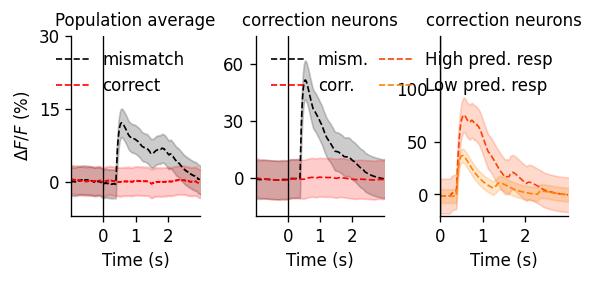

In [10]:
def get_parameters(runs,parameter):
    return np.array([ [ slice[parameter] for slice in run.reconstruction_log ] for run in runs])

""" Preprocess the data """ 
# nu parameter to load the network
with open(f"./regular_runs.pickle",'rb') as file:
    run_logs = pickle.load(file)

# loading the stimulus
with open("signal_model_update_snapshot.pickle", "rb") as file:
    t,bu,td,t1,t2 = pickle.load(file)

# time vector, we cut the start and the end to fit the convolution of the calcium trace
t = t[:-int(5*tau_decay/2/dt)] + 5*tau_decay/2

# Extract the spikes from the network simulations
spike_data_runs = get_parameters(run_logs,'s')

#calcium trace taken from the literature

# Parameters for the calcium trace
tau_rise = 0.080
tau_decay = 0.4

# Calculate the calcium trace from the spikes
F_runs = np.array([ spike_to_F(np.array(spike_data).T, tau_rise, tau_decay, dt,baseline=3) for spike_data in spike_data_runs])


# Timings of the two different stimuli
t1 = 2*x_duration
t2 = 4*x_duration

# Calculate the mean of the calcium trace to extract Delta F/F for each neuron individually
# We note that we do not average over axis=1, because we want to keep the individual neurons
F_runs_mean = np.mean(F_runs,axis=(0,2))
F_runs_normalized = (F_runs - F_runs_mean[np.newaxis,:,np.newaxis])/F_runs_mean[np.newaxis,:,np.newaxis]
F_runs_normalized_mean = np.mean(F_runs_normalized,axis=0)
F_runs_normalized_std = np.std(F_runs_normalized,axis=0)

# We calculate the mean of the calcium trace for the population
F_runs_population_mean = np.mean(F_runs[:,:,:int((t2-1- 5*tau_decay/2)/dt)])
F_population = (np.mean(F_runs,axis=(0,1)) - F_runs_population_mean)/F_runs_population_mean *100
F_population_std = np.std(F_population,axis=0)

# We calculate the mean of the calcium trace for the correction neurons
F_runs_omission_mean = np.mean(F_runs[:,3,:int((t2-1- 5*tau_decay/2)/dt)])
F_omission = (np.mean(F_runs,axis=(0))[3] - F_runs_omission_mean)/F_runs_omission_mean * 100
F_omission_std = np.std(F_omission,axis=0)

mean_sample_activity = np.mean(F_runs[:,0,int((t2+0.5 - 5*tau_decay/2)/dt):int((t2+0.9-5*tau_decay/2)/dt)],axis=(1))
mean_sample_activity_omission = np.mean(F_runs[:,3,int((t2+0.5 - 5*tau_decay/2)/dt):int((t2+0.9-5*tau_decay/2)/dt)],axis=(1))

# Sort based on the severity of the response
sorted_indices = np.argsort(mean_sample_activity)

F_omission_pred = (np.mean(F_runs[sorted_indices[-5:]],axis=(0))[3] - F_runs_omission_mean)/F_runs_omission_mean * 100
F_omission_pred_std = np.std(F_omission_pred,axis=0)

F_omission_npred = (np.mean(F_runs[sorted_indices[:5]],axis=(0))[3] - F_runs_omission_mean)/F_runs_omission_mean *100
F_omission_npred_std = np.std(F_omission_npred,axis=0)



""" Plot the results """
plt.Figure()
fac = 0.7
fig, ax = plt.subplots(1,3,figsize=(183/25.4*fac,89/25.4*fac),dpi=120)

""" FIG3 a) """

ax[0].plot(t - t2, F_population,color='black',linewidth=1,linestyle='--',label='mismatch')
ax[0].fill_between(t - t2, F_population - F_population_std, F_population + F_population_std, color='black',alpha=0.2)
ax[0].plot(t - t1, F_population,color='red',linewidth=1,linestyle='--',label='correct')
ax[0].fill_between(t - t1, F_population - F_population_std, F_population + F_population_std, color='red',alpha=0.2)

ax[0].plot([0,0],[-7,30],color='black',linewidth=0.8)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[0].set_ylim([-7,30])
ax[0].set_yticks([0,15,30])
ax[0].set_xlim([-1,3])
ax[0].set_xticks([0,1,2])

ax[0].set_ylabel(r"$\Delta F/F$ (%)")
ax[0].set_xlabel(r"Time (s)")
ax[0].set_title("Population average",fontsize=10)
ax[0].legend(frameon=False,loc='upper right')


""" FIG3 b) """
ax[1].plot(t - t2, F_omission,color='black',linewidth=1,linestyle='--',label='mism.')
ax[1].fill_between(t - t2, F_omission - F_omission_std, F_omission + F_omission_std, color='black',alpha=0.2)
ax[1].plot(t - t1, F_omission,color='red',linewidth=1,linestyle='--',label='corr.')
ax[1].fill_between(t - t1, F_omission - F_omission_std, F_omission + F_omission_std, color='red',alpha=0.2)

ax[1].plot([0,0],[-20,75],color='black',linewidth=0.8)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].set_ylim([-20,75])
ax[1].set_yticks([0,30,60])
ax[1].set_xlim([-1,3])
ax[1].set_xticks([0,1,2])

ax[1].set_xlabel(r"Time (s)")
ax[1].set_title("correction neurons",fontsize=10)
ax[1].legend(frameon=False,loc='upper right')

fig.tight_layout()


""" FIG3 c) """
ax[2].plot(t - t2, F_omission_pred,color='#fc4103',linewidth=1,linestyle='--',label='High pred. resp')
ax[2].fill_between(t - t2, F_omission_pred - F_omission_pred_std, F_omission_pred + F_omission_pred_std, color='#fc4103',alpha=0.2)

ax[2].plot(t - t2, F_omission_npred,color='#fc8403',linewidth=1,linestyle='--',label='Low pred. resp')
ax[2].fill_between(t - t2, F_omission_npred - F_omission_npred_std, F_omission_npred + F_omission_npred_std, color='#fc8403',alpha=0.2)

ax[2].plot([0,0],[-20,150],color='black',linewidth=0.8)
   
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)

ax[2].set_ylim([-20,150])
ax[2].set_yticks([0,50,100])
ax[2].set_xlim([-0,3])
ax[2].set_xticks([0,1,2])

ax[2].set_xlabel(r"Time (s)")
ax[2].set_title("correction neurons",fontsize=10)
ax[2].legend(frameon=False,loc='upper right')

fig.savefig('4.pdf')


# Fig 4. Showcasing the difference in switching times between a partial and full mismatch

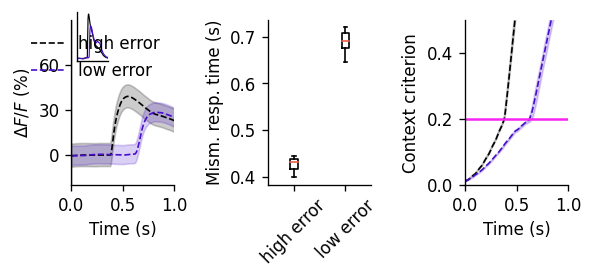

In [11]:

""" Loading the data """
with open(f"./regular_runs.pickle",'rb') as file:
    run_logs = pickle.load(file)

with open(f"./mismatch_runs.pickle",'rb') as file:
    run_logs_k = pickle.load(file)

with open("signal_model_update_snapshot.pickle", "rb") as file:
    t,bu,td,t1,t2 = pickle.load(file)

# Matching the stimulus time in time-steps to actual time
t1*=dt
t2*=dt

t = t[:-int(5*tau_decay/2/dt)] + 5*tau_decay/2

# Extracting the spikes
spike_data_runs = get_parameters(run_logs,'s')
spike_data_runs_k = get_parameters(run_logs_k,'s')

# Calculating the fluorescence trace
F_runs = np.array([ spike_to_F(np.array(spike_data).T, tau_rise, tau_decay, dt,baseline=4) for spike_data in spike_data_runs])
F_k_runs = np.array([ spike_to_F(np.array(spike_data).T, tau_rise, tau_decay, dt,baseline=4) for spike_data in spike_data_runs_k])

# Calculating the mean of the fluorescence trace for each neuron for full mismatch
F_runs_mean = np.mean(F_runs,axis=(0,2))
F_runs_normalized = (F_runs - F_runs_mean[np.newaxis,:,np.newaxis])/F_runs_mean[np.newaxis,:,np.newaxis]
F_runs_normalized_mean = np.mean(F_runs_normalized,axis=0)
F_runs_normalized_std = np.std(F_runs_normalized,axis=0)

# Calculating the mean of the fluorescence trace for the population for full mismatch
F_runs_population_mean = np.mean(F_runs[:,:,:int((t2-1)/dt)])
F_population = (np.mean(F_runs,axis=(0,1)) - F_runs_population_mean)/F_runs_population_mean *100
F_population_std = np.std(F_population,axis=0)

# Calculating the mean of the fluorescence trace for the correction neurons for full mismatch
F_runs_omission_mean = np.mean(F_runs[:,3,:int((t2-1)/dt)])
F_omission = (np.mean(F_runs,axis=(0))[3] - F_runs_omission_mean)/F_runs_omission_mean * 100
F_omission_std = np.std(F_omission,axis=0)

# Calculating the mean of the fluorescence trace for each neuron for partial mismatch
F_k_runs_mean = np.mean(F_k_runs,axis=(0,2))
F_k_runs_normalized = (F_k_runs - F_k_runs_mean[np.newaxis,:,np.newaxis])/F_k_runs_mean[np.newaxis,:,np.newaxis]
F_k_runs_normalized_mean = np.mean(F_k_runs_normalized,axis=0)
F_k_runs_normalized_std = np.std(F_k_runs_normalized,axis=0)

# Calculating the mean of the fluorescence trace for the population for partial mismatch
F_k_runs_population_mean = np.mean(F_k_runs[:,:,:int((t2-1)/dt)])
F_k_population = (np.mean(F_k_runs,axis=(0,1)) - F_k_runs_population_mean)/F_k_runs_population_mean *100
F_k_population_std = np.std(F_k_population,axis=0)

# Calculating the mean of the fluorescence trace for the correction neurons for partial mismatch
F_k_runs_omission_mean = np.mean(F_k_runs[:,3,:int((t2-1)/dt)])
F_k_omission = (np.mean(F_k_runs,axis=(0))[3] - F_k_runs_omission_mean)/F_k_runs_omission_mean * 100
F_k_omission_std = np.std(F_k_omission,axis=0)


""" We calculate the time of the first crossing of the threshold for each simulation """
F_omission_paths = (F_runs[:,3,int((t2- 5*tau_decay/2 )/dt):int((t2+1- 5*tau_decay/2)/dt)] - F_runs_omission_mean)/F_runs_omission_mean * 100
F_k_omission_paths = (F_k_runs[:,3,int((t2- 5*tau_decay/2 )/dt):int((t2- 5*tau_decay/2+1)/dt)] - F_k_runs_omission_mean)/F_k_runs_omission_mean * 100

F_omission_paths_max = np.max(F_omission_paths,axis=1)*0 + 20
F_k_omission_paths_max = np.max(F_k_omission_paths,axis=1)*0 + 20

def find_crossing_index(path, threshold):
    for i, value in enumerate(path):
        if value >= threshold:
            return i
    return np.nan

# calculate the time of the first crossing of the threshold for each simulation
omission_passing_times = dt*np.array([find_crossing_index(path, threshold) for path,threshold in zip(F_omission_paths,F_omission_paths_max)])
omission_passing_times_k = dt*np.array([find_crossing_index(path, threshold) for path,threshold in zip(F_k_omission_paths,F_k_omission_paths_max)])
# filter for nan values (if the threshold is not crossed)
omission_passing_times = omission_passing_times[~np.isnan(omission_passing_times)]
omission_passing_times_k = omission_passing_times_k[~np.isnan(omission_passing_times_k)]

""" We calculate the mean of the activity of the correction neurons for each simulation """
mean_sample_activity = np.mean(F_runs[:,0],axis=1)#int(t2/dt):int((t2+0.5)/dt)],axis=(1))
sorted_indices = np.argsort(mean_sample_activity)


F_omission_pred = (np.mean(F_runs[sorted_indices[-5:]],axis=(0))[3] - F_runs_omission_mean)/F_runs_omission_mean * 100
F_omission_pred_std = np.std(F_omission_pred,axis=0)

F_omission_npred = (np.mean(F_runs[sorted_indices[:5]],axis=(0))[3] - F_runs_omission_mean)/F_runs_omission_mean *100
F_omission_npred_std = np.std(F_omission_npred,axis=0)

""" We calculate the mean of the context error for each simulation """
context_data_runs = get_parameters(run_logs,'cl')[:,int((t2)/dt):int((t2+1)/dt)]
context_mean = np.mean(context_data_runs,axis=0)
context_std = np.std(context_data_runs,axis=0)

context_data_runs_k = get_parameters(run_logs_k,'cl')[:,int((t2)/dt):int((t2+1)/dt)]
context_mean_k = np.mean(context_data_runs_k,axis=0)
context_std_k = np.std(context_data_runs_k,axis=0)

t_context = np.arange(len(context_mean))*dt

""" Plot the results """

plt.Figure()
fac = 0.7
fig, ax = plt.subplots(1,3,figsize=(183/25.4*fac,89/25.4*fac),dpi=120)

"""  FIG4 a) """
ax[0].plot(t - t2, F_omission,color='black',linewidth=1,linestyle='--',label='high error')

ax[0].fill_between(t - t2, F_omission - F_omission_std, F_omission + F_omission_std, color='black',alpha=0.2)
ax[0].plot(t - t2, F_k_omission,color='C5',linewidth=1,linestyle='--',label='low error')
ax[0].fill_between(t - t2, F_k_omission - F_k_omission_std, F_k_omission + F_k_omission_std, color='C5',alpha=0.2)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].plot([0,0],[-20,90],color='black',linewidth=0.8)
ax[0].set_ylim([-20,90])
ax[0].set_yticks([0,30,60])
ax[0].set_xlim([-0,1])
ax[0].set_xticks([0,0.5,1])
ax[0].set_ylabel(r"$\Delta F/F$ (%)")
ax[0].set_xlabel(r"Time (s)")
# We want to draw the legend above the axes
ax[0].legend(frameon=False,loc='upper right')

left, bottom, width, height = 0.05, 0.75, 0.3, 0.3  # Adjust these values as needed
inset_ax = ax[0].inset_axes([left, bottom, width, height])

inset_ax.plot(t - t2, F_omission,color='black',linewidth=0.7)
inset_ax.plot(t - t2, F_k_omission,color='C5',linewidth=0.7)
inset_ax.spines['top'].set_visible(False)  # Hide the top border
inset_ax.spines['right'].set_visible(False)
inset_ax.set_xticks([])
inset_ax.set_yticks([])
inset_ax.set_xlim([-1,3])

""" FIG4 b) """

ax[1].boxplot([omission_passing_times,omission_passing_times_k],showfliers=False)
ax[1].set_xticklabels(['high error', 'low error'],rotation=45)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_ylabel(r"Mism. resp. time (s)")

""" FIG4 c) """
ax[2].plot(t_context,context_mean,color='black',linewidth=1,linestyle='--',label='high error')
ax[2].fill_between(t_context,context_mean - context_std,context_mean + context_std, color='black',alpha=0.2)

ax[2].plot(t_context,context_mean_k,color='C5',linewidth=1,linestyle='--',label='high error')
ax[2].fill_between(t_context,context_mean_k - context_std_k,context_mean_k + context_std_k, color='C5',alpha=0.2)

ax[2].plot([0,1],[0.2,0.2],color='#f725f3')

ax[2].set_ylim([0,0.5])
ax[2].set_xlabel(r"Time (s)")
ax[2].set_ylabel(r"Context criterion")
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].set_xlim([0,1])
ax[2].set_xticks([0,0.5,1])

fig.tight_layout()
fig.savefig('mismatch_time.pdf')
